<a href="https://colab.research.google.com/github/wallyliu2/AmazonReivewQuiz/blob/master/MusicalInstruments_5Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Prepare Data

In [ ]:
# import packages we need and load the data into the notebook

import pandas as pd
import numpy as np
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/drive/My Drive/AmazonDataset/reviews_Musical_Instruments_5.json.gz')
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"


In [ ]:
# adding datetime columns to the dataframe

from datetime import datetime

date_obj = []
month_obj = []
year_obj = []

for i in df["reviewTime"]:
    datestrip = datetime.strptime(i, '%m %d, %Y')
    date_obj.append(datestrip)

df["date"] = date_obj
df['Year'] = df.date.dt.year
df['Month'] = df.date.dt.month
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,date,Year,Month
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",2014-02-28,2014,2


In [ ]:
# df["helpful"][1][1]
n_helpful = []
d_helpful = []

for i in df["helpful"]:
    n_helpful.append(i[0])

df["n_helpful"] = n_helpful

for i in df["helpful"]:
    d_helpful.append(i[1])

df["d_helpful"] = d_helpful

df["helpful_pct"] = df["n_helpful"]/df["d_helpful"]

helpful_yes = []

for i in df["d_helpful"]:
    if i == 0:
      helpful_yes.append(0)
    else:
      helpful_yes.append(1)

df["helpful_yes"] = helpful_yes

review_length = []

for i in df["reviewText"]:
    review_length.append(len(i))

df["review_length"] = review_length

df = df.fillna(0) # fill na for helpful_pct

df.iloc[45:50] # arbitery check

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,date,Year,Month,n_helpful,d_helpful,helpful_pct,helpful_yes,review_length
45,A398X9POBHK69N,B000068NW5,Ann Vande Zande,"[0, 0]",This is a very nice cable for the price. I alr...,4.0,Does What You Want,1388966400,"01 6, 2014",2014-01-06,2014,1,0,0,0.000000,0,242
46,A13A81NN0NRD1S,B000068NW5,"aspiring saint ""TATITTLE""","[12, 13]",Cheap and good texture rubber that does not ge...,4.0,"flexible, soft rubber is great.",1290038400,"11 18, 2010",2010-11-18,2010,11,12,13,0.923077,1,122
47,A1EUO0BU72JR7T,B000068NW5,Bilbo,"[0, 0]","Seems sturdy enough, and no noise issues, so I...",5.0,"Works wonderfully, no noise",1372291200,"06 27, 2013",2013-06-27,2013,6,0,0,0.000000,0,192
48,A1H4WSC8JWS59N,B000068NW5,bradley,"[0, 0]","I'm not a professional, but have been playing ...",5.0,excellent,1359504000,"01 30, 2013",2013-01-30,2013,1,0,0,0.000000,0,156
49,A3OXHLG6DIBRW8,B000068NW5,"C. Hill ""CFH""","[0, 1]","This Hosa Cable is very well made, with good q...",5.0,"Great Guitar Cable, Good Value - Highly Recomm...",1346803200,"09 5, 2012",2012-09-05,2012,9,0,1,0.000000,1,425


In [ ]:
# drop the columns that we don't need for exploring data at this time
df = df.drop(["reviewerName","helpful","unixReviewTime","reviewTime"],axis=1)
df.head(1)

,reviewerID,asin,reviewText,overall,summary,date,Year,Month,n_helpful,d_helpful,helpful_pct,helpful_yes,review_length
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5.0,good,2014-02-28,2014,2,0,0,0.0,0,268


# EDA

In [ ]:
df_new = df.copy()

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   reviewerID     10261 non-null  object        
 1   asin           10261 non-null  object        
 2   reviewText     10261 non-null  object        
 3   overall        10261 non-null  float64       
 4   summary        10261 non-null  object        
 5   date           10261 non-null  datetime64[ns]
 6   Year           10261 non-null  int64         
 7   Month          10261 non-null  int64         
 8   n_helpful      10261 non-null  int64         
 9   d_helpful      10261 non-null  int64         
 10  helpful_pct    10261 non-null  float64       
 11  helpful_yes    10261 non-null  int64         
 12  review_length  10261 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.1+ MB


In [ ]:
# check the overall(star) info within reviews
df_new.overall.describe()

count    10261.000000
mean         4.488744
std          0.894642
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [ ]:
# the percentage of reviews by star
df_new.overall.value_counts()/len(df_new.reviewerID)

5.0    0.676152
4.0    0.203099
3.0    0.075236
2.0    0.024364
1.0    0.021148
Name: overall, dtype: float64

In [ ]:
# the percentage of helpful reviews by star
df_new[df_new["helpful_yes"]==1].overall.value_counts()/df_new.overall.value_counts()

5.0    0.301816
4.0    0.349808
3.0    0.454663
2.0    0.588000
1.0    0.663594
Name: overall, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


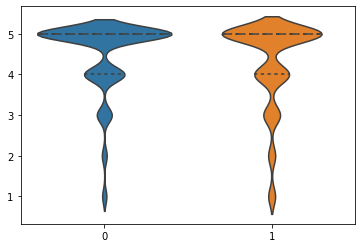

In [ ]:
# Use seaborn to draw a violin plot of overall vs helpful counts 
import seaborn as sb

sb.violinplot(data=[df_new["overall"],df_new[df_new["helpful_yes"]==1].overall], inner="quartile", bw=0.2);

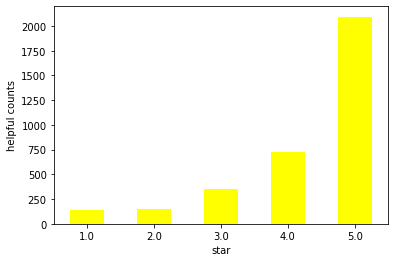

In [ ]:
# how many helpful reviews for each star

df_star_count = df_new.groupby("overall").agg({"helpful_yes":"sum"})
ax = df_star_count.plot.bar(legend=False,rot=0,color="yellow");
ax.set_xlabel("star");
ax.set_ylabel("helpful counts");
fig = ax.get_figure()
fig.savefig('helpful_in_star.png')

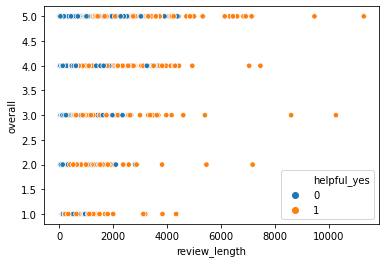

In [ ]:
#df_new.plot.scatter(x="review_length",y="overall");
ax = sb.scatterplot("review_length","overall",s=30,hue="helpful_yes",data=df_new)
# the length of reviews vs. helpful or not in 5 star review
# ax = sb.scatterplot("review_length","helpful_yes",s=30,edgecolor="none",data=df_new[df_new.overall==5])
fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/M_helpfulReview_in_length.png')

In [ ]:
#!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
# retrieve the reveiws by helpful and overall(star)
def helpful_star_reviews(df,helpful_yes,star):
    # filter the dataframe by overall(star)
    overall = df[df["overall"]==star]
    reviews = overall[overall["helpful_yes"]==helpful_yes]
    # only take review column of the indicated star rows
    reviews = reviews["reviewText"]
    return reviews

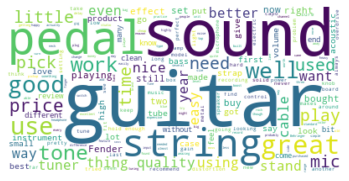

In [ ]:
# pulling the dataframe with helpful good 5 star reviews
helpful_review = helpful_star_reviews(df_new, 1,5)
# Create a combination of all review
text = " ".join(review for review in helpful_review)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["to", "this", "the", "is", "a","an","one","will", "much",
                  "make","amp","back","ha","really"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('/content/drive/My Drive/M_helpful_5stars_words.png');

# Join the table with Sales info

In [ ]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df_meta = getDF('/content/drive/My Drive/AmazonDataset/meta_Musical_Instruments.json.gz')

In [ ]:
# left join
df_combined =  pd.merge(df_new, df_meta, on='asin', how='left')
df_combined = df_combined.drop(["title","imUrl","categories","related","brand","description"],axis=1)
df_combined.head(1)

,reviewerID,asin,reviewText,overall,summary,date,Year,Month,n_helpful,d_helpful,helpful_pct,helpful_yes,review_length,price,salesRank
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5.0,good,2014-02-28,2014,2,0,0,0.0,0,268,7.09,{'Musical Instruments': 2880}


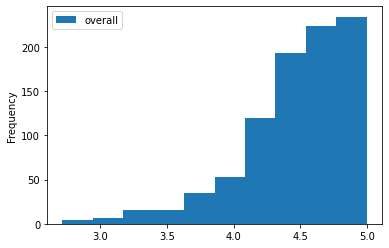

In [ ]:
# asin with star distribution
df_avg_star = df_combined.groupby("asin").mean().reset_index()
ax = df_avg_star.plot.hist(x="asin",y="overall");
fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/asin_star.png')

**Time Series Data**

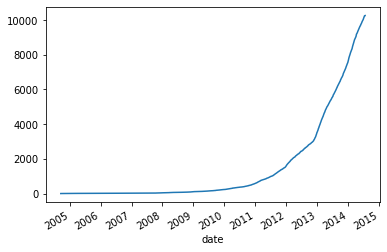

In [ ]:
# total number of reviews by time
df_date = df_combined.groupby("date").agg({"reviewText":"count"}).reset_index()
df_date = df_date.set_index("date").sort_index()
ax = df_date.cumsum().plot(legend=False);
fig = ax.get_figure()
fig.savefig('/content/drive/My Drive/review_by_time.png')

In [ ]:
df_combined.groupby("asin").agg({"reviewerID":"count"}).sort_values("reviewerID",ascending=False).head(1)

,reviewerID
asin,
B003VWJ2K8,163


{'Musical Instruments': 17}


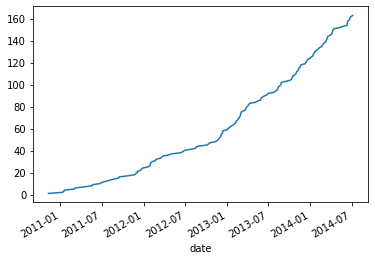

In [ ]:
# the most number of review product
df_asin = df_combined.groupby(["asin","date"]).agg({"reviewText":"count"}).reset_index()
df_asin = df_asin.set_index("date").sort_index()
df_asin[df_asin.asin=="B003VWJ2K8"].cumsum().plot(legend=False);
for i in df_combined[df_combined.asin=="B003VWJ2K8"].salesRank:
  print(i)
  break

**Check the relationship between price and reviews**

In [ ]:
df_price = df_combined.drop("salesRank",axis=1)
df_price.head(1)

,reviewerID,asin,reviewText,overall,summary,date,Year,Month,n_helpful,d_helpful,helpful_pct,helpful_yes,review_length,price
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5.0,good,2014-02-28,2014,2,0,0,0.0,0,268,7.09


In [ ]:
df_price = df_price.dropna()

# Calculate how many data loss after dropping
loss = round((1-df_price.reviewerID.value_counts().sum()/df_combined.reviewerID.value_counts().sum())*100,2)
print(f"There is {loss}% loss from the total records.")

There is 0.14% loss from the total records.


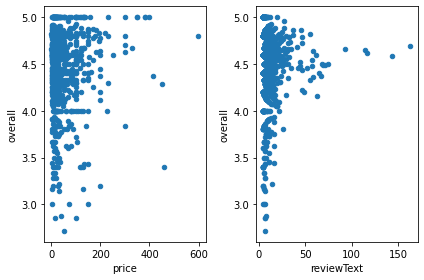

In [ ]:
# create two columns plotting area
fig, axes = plt.subplots(ncols=2)
# plot on 1st area by using pandas
df_price.groupby("asin").agg({"price":"mean","overall":"mean","reviewText":"count"}).plot.scatter(x="price",y="overall",ax=axes[0]);
# plot on second area by using pandas
df_price.groupby("asin").agg({"price":"mean","overall":"mean","reviewText":"count"}).plot.scatter(x="reviewText",y="overall",ax=axes[1]);
# ensure no overlapping between these two charts
fig.tight_layout()
fig.savefig("/content/drive/My Drive/M_price_and_review_by_star.png", dpi=100, bbox_inches="tight")

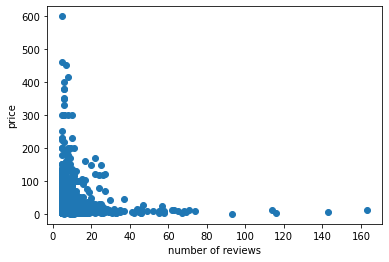

In [ ]:
df_price_new = df_price.groupby("asin").agg({"price":"mean","overall":"mean","reviewText":"count"})

fig, ax = plt.subplots()
ax.scatter(df_price_new["reviewText"], df_price_new["price"]);
ax.set_xlabel("number of reviews");
ax.set_ylabel("price");
fig.savefig("/content/drive/My Drive/M_price_and_review.png", dpi=100, bbox_inches="tight")

**Check the relationship between salesRank and reviews**

In [ ]:
df_rank = df_combined.drop("price",axis=1)
df_rank["salesRank"] = df_rank["salesRank"].astype('str')
df_rank["rank"] = df_rank["salesRank"].str.extract('(\d+)')
df_rank.head(1)

,reviewerID,asin,reviewText,overall,summary,date,Year,Month,n_helpful,d_helpful,helpful_pct,helpful_yes,review_length,salesRank,rank
0,A2IBPI20UZIR0U,1384719342,"Not much to write about here, but it does exac...",5.0,good,2014-02-28,2014,2,0,0,0.0,0,268,{'Musical Instruments': 2880},2880


In [ ]:
df_rank = df_rank.dropna()

# Calculate how many data loss after dropping
loss = round((1-df_rank.reviewerID.value_counts().sum()/df_combined.reviewerID.value_counts().sum())*100,2)
print(f"There is {loss}% loss from the total records.")

There is 0.61% loss from the total records.


In [ ]:
df_rank["rank"] = df_rank["rank"].astype(str).astype(int)
df_rank_new = df_rank.groupby("asin").agg({"rank":"mean","overall":"mean","reviewText":"count"}).sort_values("rank",ascending=True)

top = df_rank_new["rank"].min()
bottom = df_rank_new["rank"].max()
unique = df_rank_new["rank"].nunique()
print(f"The data set ranking range is between {top} and {bottom}, and has {unique} products.")

The data set ranking range is between 4 and 65127, and has 840 products.


In [ ]:
# set the range of bins
bins = [0, 500, 1500, 2500, 5000, 10000, 100000]

# label by the range
cuts = pd.cut(df_rank_new["rank"], bins, include_lowest=True)
df_rank_new["SalesRanking"] = cuts

df_rank_new_1 = df_rank_new.groupby("SalesRanking").agg({"overall":"mean","rank":"count"})
df_rank_new_1["% of total"] = round(df_rank_new_1["rank"]/unique*100,2)
df_rank_new_1 = df_rank_new_1.rename(columns={"overall": "star", "rank": "product counts"})
df_rank_new_1

,star,product counts,% of total
SalesRanking,,,
"(-0.001, 500.0]",4.469725,189,22.50
"(500.0, 1500.0]",4.488116,209,24.88
"(1500.0, 2500.0]",4.514486,111,13.21
"(2500.0, 5000.0]",4.423311,135,16.07
"(5000.0, 10000.0]",4.415195,92,10.95
"(10000.0, 100000.0]",4.468929,156,18.57
